In [ ]:
import tensorflow as tf
import keras 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#!unzip "/content/drive/MyDrive/Brain Tumor Project/Brain tumor.zip" -d "/content/drive/MyDrive/Brain Tumor Project/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_root = "/content/drive/MyDrive/tmt"

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(224, 224),batch_size=1952)

Found 2000 images belonging to 2 classes.


In [ ]:
batches.class_indices

{'Bacterial_Spot': 0, 'Healthy': 1}

In [ ]:
imgs, labels = next(batches)


In [ ]:
print(imgs.shape)
print(labels.shape)

(1952, 224, 224, 3)
(1952, 2)


In [ ]:
from sklearn.model_selection import train_test_split
# Train, validation and test split

X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.15, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [ ]:
print("*-*-*-*-*-*")
print("Train")
print(X_train.shape)
print(y_train.shape)


print("*-*-*-*-*-*")
print("Validation")
print(X_val.shape)
print(y_val.shape)

print("*-*-*-*-*-*")
print("Test")
print(X_test.shape)
print(y_test.shape)

*-*-*-*-*-*
Train
(1410, 224, 224, 3)
(1410, 2)
*-*-*-*-*-*
Validation
(249, 224, 224, 3)
(249, 2)
*-*-*-*-*-*
Test
(293, 224, 224, 3)
(293, 2)


In [ ]:
from tensorflow.keras.applications import DenseNet201
conv_base = DenseNet201(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))


74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
from keras import models
from keras.layers import Dropout

from keras import layers
model = models.Sequential()
model.add(conv_base)
#model.add(data_augmentation)
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val) ,
                    batch_size = 32, 
                    epochs = 50)

Epoch 1/50
45/45 [==============================] - 145s 973ms/step - loss: 1.8701 - accuracy: 0.9156 - val_loss: 156.8217 - val_accuracy: 0.5944
Epoch 2/50
45/45 [==============================] - 31s 681ms/step - loss: 1.3053 - accuracy: 0.9163 - val_loss: 243638.7969 - val_accuracy: 0.5221
Epoch 3/50
45/45 [==============================] - 31s 692ms/step - loss: 0.1909 - accuracy: 0.9589 - val_loss: 50.5257 - val_accuracy: 0.8956
Epoch 4/50
45/45 [==============================] - 31s 697ms/step - loss: 0.2301 - accuracy: 0.9809 - val_loss: 6.0085 - val_accuracy: 0.9277
Epoch 5/50
45/45 [==============================] - 31s 691ms/step - loss: 0.1669 - accuracy: 0.9809 - val_loss: 51497.6211 - val_accuracy: 0.5301
Epoch 6/50
45/45 [==============================] - 31s 696ms/step - loss: 0.6920 - accuracy: 0.9397 - val_loss: 14.4859 - val_accuracy: 0.5060
Epoch 7/50
45/45 [==============================] - 31s 698ms/step - loss: 0.1585 - accuracy: 0.9688 - val_loss: 7.5938 - val_ac

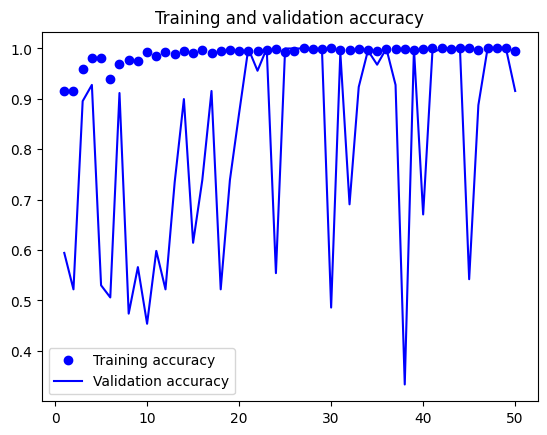

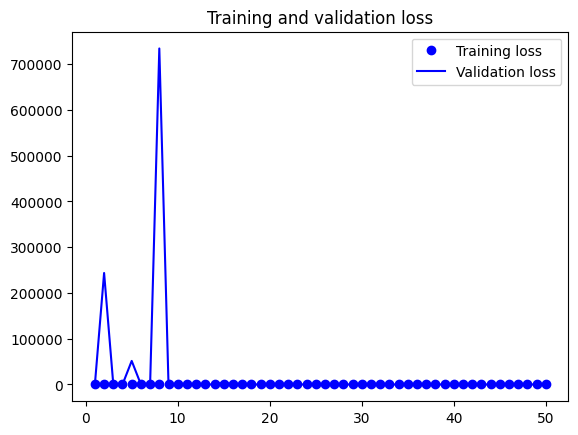

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

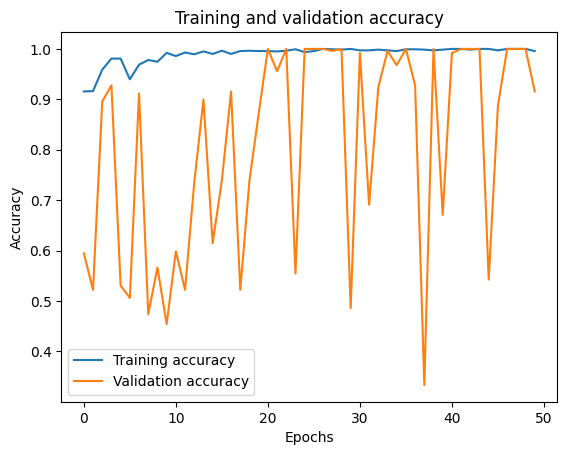

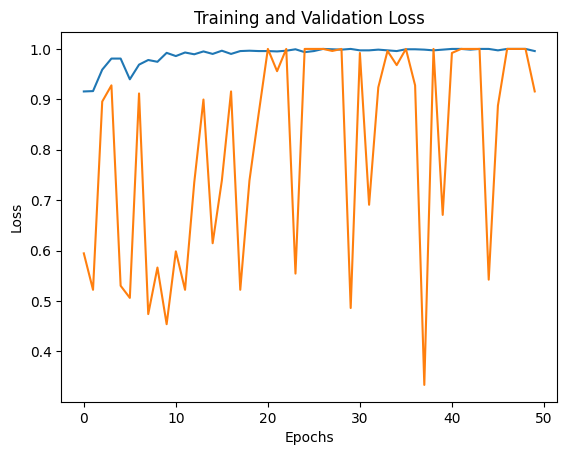

In [ ]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot using Seaborn

plt.plot(history.history['accuracy'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
#my_plot = sns.lineplot(data=history[["loss","validation_loss"]])
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 4s 366ms/step - loss: 3.5045 - accuracy: 0.8498


[3.5045394897460938, 0.849829375743866]

In [ ]:
model.save('brain_tumor.h5')

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
y_pred = model.predict(X_test, verbose=0)


In [ ]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

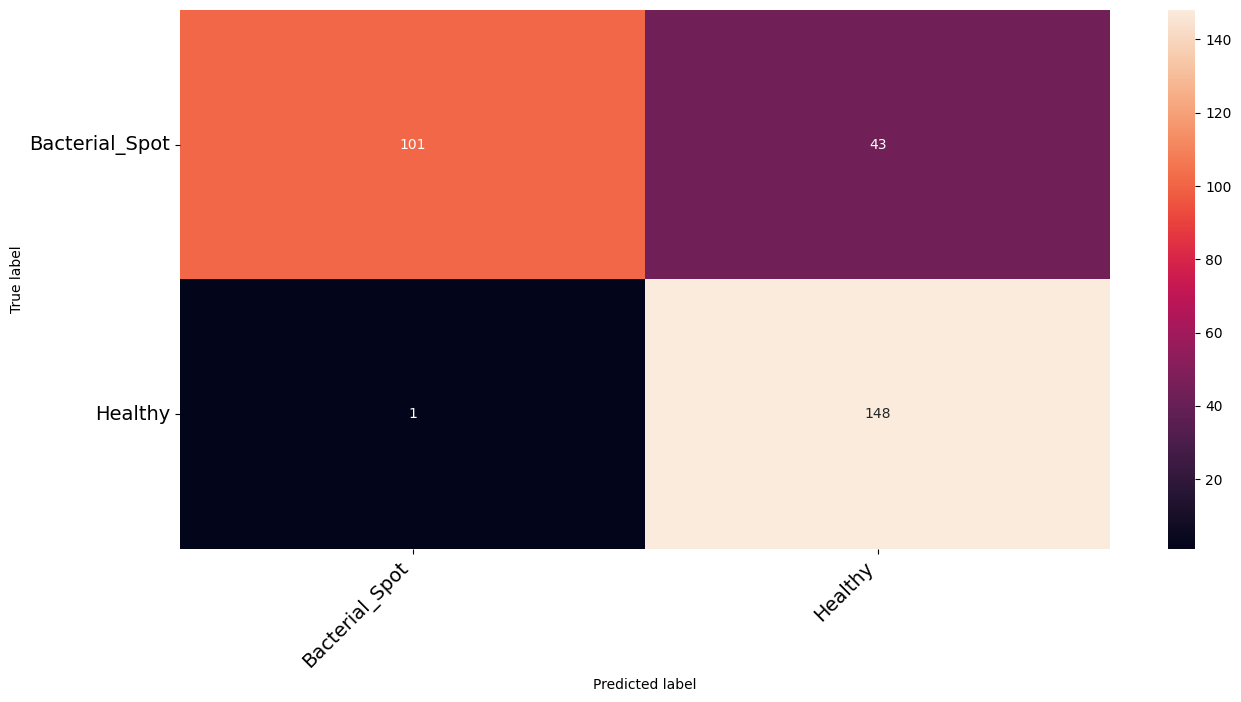

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (15,7), fontsize=14)

In [ ]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in y_test]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       144
           1       0.77      0.99      0.87       149

    accuracy                           0.85       293
   macro avg       0.88      0.85      0.85       293
weighted avg       0.88      0.85      0.85       293



In [ ]:
categories = {"HighGrade" : 0,
              "Low Grade"  : 1}
print(categories)

{'HighGrade': 0, 'Low Grade': 1}


In [ ]:
def predict_class(img):
    # Resize
    img = img.reshape(1,256,256,3)
    # Predict
    predictions = model.predict(img)
    true_prediction = [tf.argmax(pred) for pred in predictions]
    true_prediction = np.array(true_prediction)
    
    # Return label corresponding to predicted index
    return list(categories.keys())[list(categories.values()).index(true_prediction)]
    

In [ ]:
predict_class(X_test[0])

'Low Grade'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

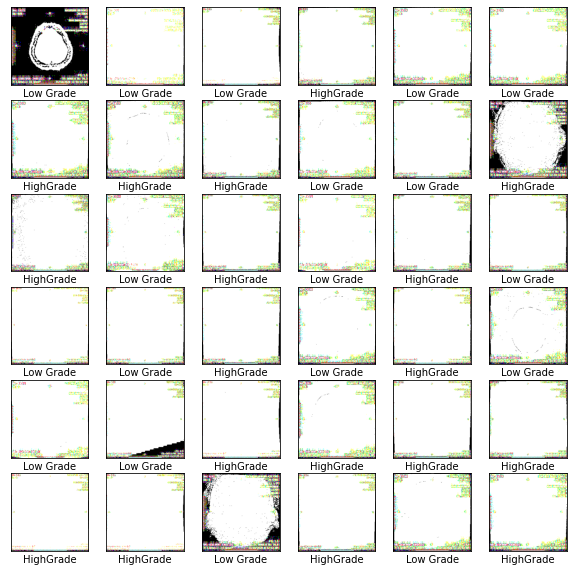

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(X_test.shape[0],36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_test[image_ind]), cmap=plt.cm.binary)
    
    # Predict and get label
    label = predict_class(X_test[image_ind])
    plt.xlabel(label)